# Imports

We import here a high level neural network API : Keras. If you want more informations about Keras : https://keras.io/about/

In [1]:
from typing import Tuple, List

# import librairies
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf

# plotting
import matplotlib.pyplot as plt
from matplotlib import pyplot

# import layers
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

# import regression model
from keras.models import Sequential
from sklearn.datasets import make_regression

# import optimizers
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.optimizers import Adadelta
from keras.optimizers import Adagrad
from keras.optimizers import RMSprop
from keras.optimizers import Adamax
from keras.optimizers import Adagrad
from keras.optimizers import Ftrl
from keras.optimizers import Nadam

# import earlystopping
from keras.callbacks import EarlyStopping

# import regularization
from tensorflow.keras import regularizers

# Data recuperation

In [2]:
# recuparate the complete data set
X_train_all = pd.read_csv('train_set.csv')
X_val_all=pd.read_csv('val_set.csv')
X_test_all=pd.read_csv('test_set.csv')

#convert into numpy arrays
X_train_all= X_train_all.to_numpy()
X_val_all= X_val_all.to_numpy()
X_test_all=X_test_all.to_numpy()


# Data reshape 

In [3]:
# splitting our data for the training and the validation in input (X) and output (y)
X_train= X_train_all[:,0:110].astype(np.float32)
y_train= X_train_all[:,110].astype(np.float32)
X_val= X_val_all[:,0:110].astype(np.float32)
y_val= X_val_all[:,110].astype(np.float32)
X_test= X_test_all.astype(np.float32)


# Model (NN, loss, optimizer &amp; .csv submission file generation)

To prevent overfitting, we use a dropout in the model, and we implement an EarlyStopping function (terminate the training process in case the model is not learning anything). 

We compute our model regarding to this website : https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/

In [4]:
def evaluate_model(X_train, y_train, X_val, y_val):
    
# define model
    model = Sequential()
    model.add(Dense(66, activation='softsign'))
    model.add(BatchNormalization())
    model.add(Dense(20, activation='softsign'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
    
    
#early stopping 
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=8)
    
# compile model  
    model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0011, rho=0.9, momentum=0))
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=90, callbacks=[callback], verbose=0)
    len(history.history['loss']) 

# evaluate the model
    train_mse = model.evaluate(X_train, y_train, verbose=0)
    val_mse = model.evaluate(X_val, y_val, verbose=0)
    print('Train: %.3f, Val: %.3f' % (train_mse, val_mse))
    print('Stop at epoch: %.f' % len(history.history['loss']) )
    
#convert into csv file
    okok = model(X_test).numpy()
    df = pd.DataFrame(okok,columns=["sat1_col"])
    df.to_csv("sat1_col.csv", index = False)

# plot loss during training
    pyplot.title('Mean Squared Error')
    pyplot.plot(history.history['loss'], label='train')
    pyplot.plot(history.history['val_loss'], label='val')
    pyplot.legend()
    pyplot.show()
    return val_mse



# Model training &amp; evaluation

Train: 0.143, Val: 0.145
Stop at epoch: 56


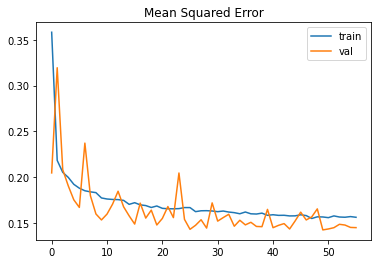

0.14491194486618042

In [5]:
evaluate_model(X_train, y_train, X_val, y_val)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8caafda0-6921-4227-a513-0500323e6b45' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>